# Notions essentielles d'informatique quantique pour le protocole BB84

Ce notebook accompagne le fichier `tutorial.md` et vous permet de pratiquer les concepts de l'informatique quantique nécessaires pour comprendre le protocole BB84.

**Objectifs :**
- Comprendre les qubits, la superposition, et les portes quantiques
- Maîtriser les bases de mesure (Z et X)
- Savoir encoder et mesurer des bits dans différentes bases
- Acquérir les outils de code réutilisables pour le challenge BB84

**Comment utiliser ce notebook :**
1. Lisez `tutorial.md` pour les explications détaillées
2. Exécutez chaque cellule de ce notebook dans l'ordre
3. Expérimentez en modifiant les paramètres
4. Réutilisez les fonctions helper pour votre challenge BB84

---
## 1. Installation et imports

Avant de manipuler un qubit, vérifions que notre environnement Python dispose des bons outils. Nous utiliserons Qiskit pour créer, excuter et mesurer des circuits quantiques (via le simulateur Aer).

Si Qiskit n’est pas encore installé sur votre machine, exécutez la cellule suivante ou installez-le manuellement : `pip install qiskit qiskit-aer`.

In [ ]:
# Option 1: Install from requirements file (recommended)
# !pip install -r requirements.txt

# Option 2: Install manually if needed
# !pip install qiskit==2.1.2 qiskit-aer matplotlib pylatexenc

Importons maintenant toutes les bibliothèques nécessaires :

In [ ]:
# Imports Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Imports Python standard
import numpy as np
import random

print("Qiskit et dépendances importées avec succès !")

✓ Qiskit et dépendances importées avec succès !


---
## 2. Qubit & Superposition

Un qubit est l’unité fondamentale de l’information quantique. Un qubit peut exister dans une superposition des états |0⟩ et |1⟩.

Les états importants :
- **|0⟩** : état de base (pôle nord de la sphère de Bloch)
- **|1⟩** : état opposé (pôle sud)
- **|+⟩ = (|0⟩ + |1⟩)/√2** : superposition égale (équateur, direction X+)
- **|−⟩ = (|0⟩ − |1⟩)/√2** : superposition avec phase négative (équateur, direction X−)

### Qu'est-ce qu'un Statevector ?

Un **Statevector** est un vecteur (matrice colonne) qui représente l'état quantique **complet** d'un système :

- **1 qubit** : vecteur de taille 2 → `[α, β]` où `|ψ⟩ = α|0⟩ + β|1⟩`
- **2 qubits** : vecteur de taille 4 → `[α₀₀, α₀₁, α₁₀, α₁₁]`
- **n qubits** : vecteur de taille 2ⁿ → explose exponentiellement !

C'est un outil pédagogique très utile pour visualiser ce qui se passe "sous le capot" !

**Important :** Au-delà de ~20 qubits, impossible à simuler (trop de mémoire)

État |0⟩ = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


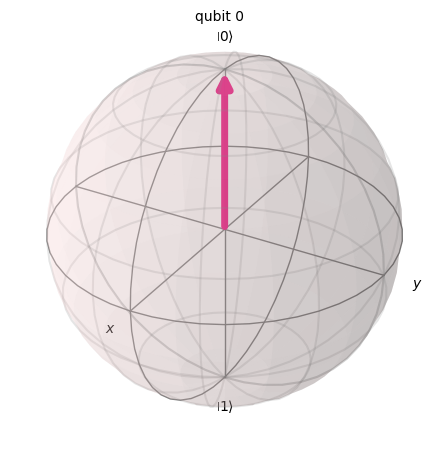

In [ ]:
# Créer et visualiser l'état |0⟩ (état par défaut)
qc_zero = QuantumCircuit(1)  # Un circuit avec un seul qubit

state_zero = Statevector(qc_zero) # Une matrice colonne représentant l'état quantique: vecteur [α, β]

print("État |0⟩ =", state_zero) # Le vecteur [α, β]

plot_bloch_multivector(state_zero)

État |+⟩ = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Probabilités : |α|² = 0.4999999999999999 , |β|² = 0.4999999999999999


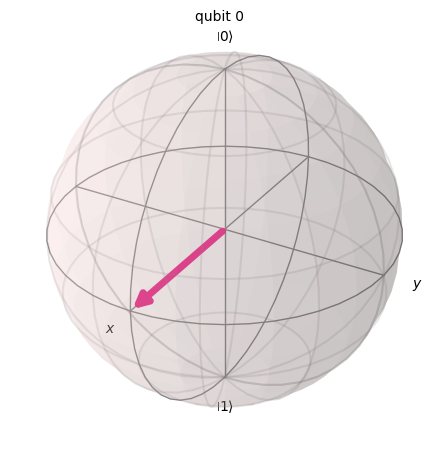

In [4]:
# Créer et visualiser l'état |+⟩ = H|0⟩
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # Appliquer la porte Hadamard pour créer la superposition
state_plus = Statevector(qc_plus)

print("État |+⟩ =", state_plus)
print("Probabilités : |α|² =", abs(state_plus[0])**2, ", |β|² =", abs(state_plus[1])**2)
plot_bloch_multivector(state_plus)

---
## 3. Portes quantiques

Les portes quantiques transforment les états des qubits (comme les portes logiques transforment les bits classiques).

### 3.1 Porte X (NOT quantique)

La porte X échange |0⟩ et |1⟩ :

X|0⟩ = |1⟩ = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


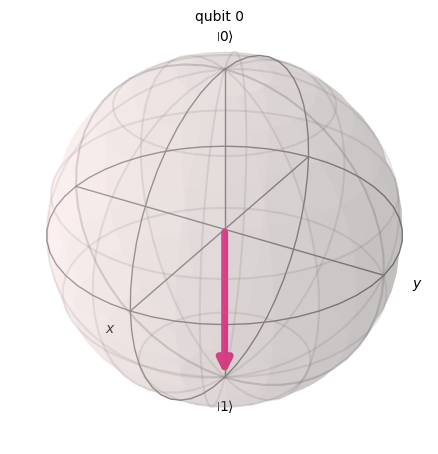

In [5]:
# Porte X : |0⟩ → |1⟩
qc_x = QuantumCircuit(1)
qc_x.x(0)  # Appliquer la porte X (NOT)
state_one = Statevector(qc_x)

print("X|0⟩ = |1⟩ =", state_one)
plot_bloch_multivector(state_one)

### 3.2 Porte H (Hadamard)

La porte H crée ou retire la superposition :

H|0⟩ = |+⟩ = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


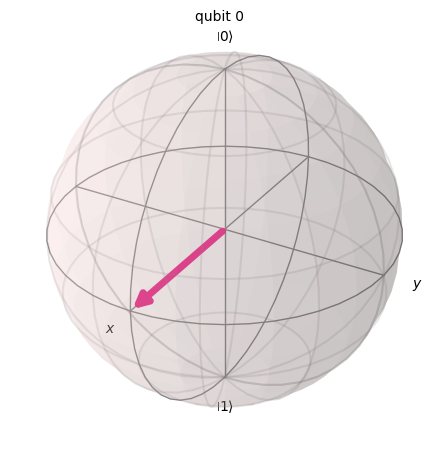

In [22]:
# H|0⟩ = (|0> + |1>)/√2 = |+⟩
qc_h0 = QuantumCircuit(1)
qc_h0.h(0)
print("H|0⟩ = |+⟩ =", Statevector(qc_h0))

# Visualiser |+⟩
plot_bloch_multivector(Statevector(qc_h0))

H|1⟩ = |−⟩ = Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


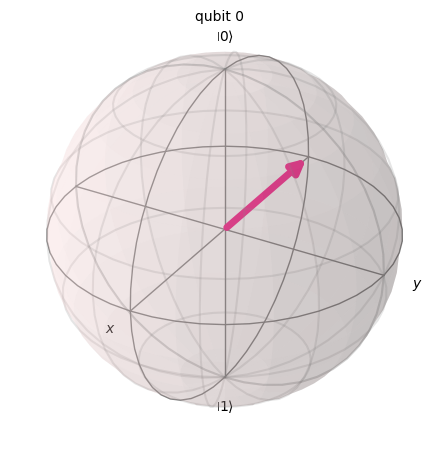

In [23]:
# HX|0⟩ = H(X|0⟩) = (|0> - |1>)/√2 = |-⟩
qc_h1 = QuantumCircuit(1)
qc_h1.x(0)  # Préparer |1⟩
qc_h1.h(0)  # Appliquer H
print("H|1⟩ = |−⟩ =", Statevector(qc_h1))

# Visualiser |−⟩
plot_bloch_multivector(Statevector(qc_h1))

### 3.3 Porte Z (Phase flip)

La porte Z inverse la phase de |1⟩ :

Z|0⟩ = -|1⟩ = Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


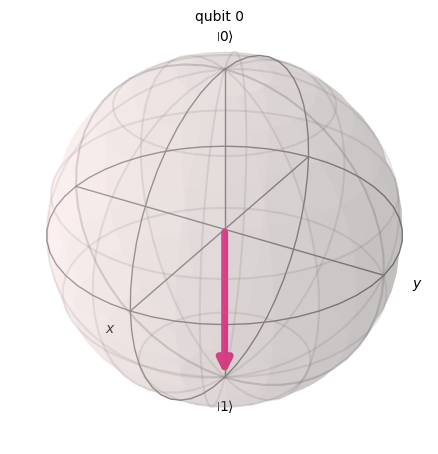

In [25]:
# Z|1⟩ = -|1⟩ (transforme + en −)
qc_z1 = QuantumCircuit(1)
qc_z1.x(0)  # Préparer |1⟩
qc_z1.z(0)  # Appliquer Z
state_1_minus = Statevector(qc_z1)

print("Z|0⟩ = -|1⟩ =", state_1_minus)
plot_bloch_multivector(state_1_minus)

**Observation importante sur la porte Z :**

Avec le Statevector, on voit bien que Z transforme |1⟩ en −|1⟩ (le signe change de + à −).

**Mais pourquoi ne voit-on pas de changement sur la sphère de Bloch ?**

Parce que |1⟩ est au pôle sud (sur l'axe Z). La porte Z effectue une rotation de π autour de l'axe Z, mais un point situé **sur** l'axe de rotation ne bouge pas ! C'est comme faire tourner une toupie : le point au sommet reste immobile.

**Pour visualiser l'effet de Z, il faut un état qui n'est PAS sur l'axe Z.**

Par exemple, avec |+⟩ (situé sur l'équateur), on verra clairement la transformation |+⟩ → |−⟩ :

Z|+⟩ = |−⟩ = Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


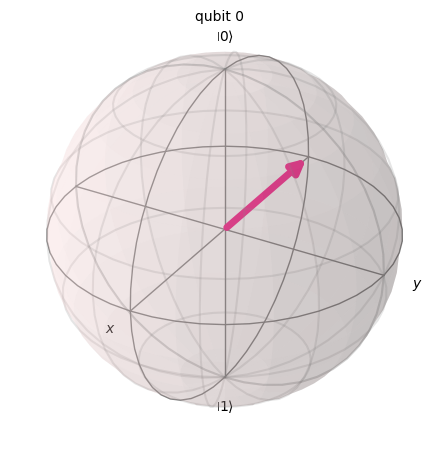

In [26]:
# Z|+⟩ = |−⟩ (transforme + en −)
qc_z = QuantumCircuit(1)
qc_z.h(0)  # Créer |+⟩
qc_z.z(0)  # Appliquer Z
state_minus = Statevector(qc_z)

print("Z|+⟩ = |−⟩ =", state_minus)
plot_bloch_multivector(state_minus)

### 3.4 Porte CNOT (Controlled-NOT)

La porte CNOT agit sur deux qubits : si le qubit de contrôle est |1⟩, elle applique X sur le qubit cible.


Circuit:


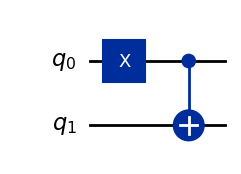

In [31]:
# CNOT : |01⟩ → |11⟩ (contrôle qubit=0, cible qubit=1)
qc_cnot = QuantumCircuit(2)
qc_cnot.x(0)  # Préparer le qubit 0 dans |1⟩
qc_cnot.cx(0, 1)  # CNOT avec contrôle qubit=0, cible qubit=1

print("\nCircuit:")
qc_cnot.draw('mpl')

In [ ]:
# Afficher l'état après CNOT
print("État après CNOT:")
state_cnot = Statevector(qc_cnot)
print(state_cnot)

État après CNOT:
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


### Comment lire un Statevector à 2 qubits ?

Pour 2 qubits, le vecteur a **4 composantes** : `[α₀₀, α₀₁, α₁₀, α₁₁]`

Chaque composante correspond à un état de base :

| Position | État | Qubit 1 | Qubit 0 | Valeur dans notre exemple |
|----------|------|---------|---------|---------------------------|
| 0        | \|00⟩| 0       | 0       | 0 + 0j                    |
| 1        | \|01⟩| 0       | 1       | 0 + 0j                    |
| 2        | \|10⟩| 1       | 0       | 0 + 0j                    |
| 3        | \|11⟩| 1       | 1       | **1 + 0j** ✓              |

**Résultat :** `[0, 0, 0, 1]` → seule la position 3 est à 1 → **l'état est |11⟩ avec 100% de probabilité**

**Explication du circuit :**
1. X(qubit 0) : |00⟩ → |10⟩ (qubit 0 passe à 1, rappel : little-endian)
2. CNOT(0→1) : qubit 0 = 1 (contrôle actif) → applique X sur qubit 1 → |11⟩

---
## 5. Mesure et effondrement de l'état

Mesurer un qubit projette son état sur |0⟩ ou |1⟩ et détruit la superposition (effondrement).
Le the measurement outcome is stored in a classical bit.

Exemple 1:

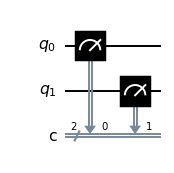

In [36]:
qc_em = QuantumCircuit(2, 2) # 2 

# Measure the qubits and store the outcome in the classical bits of an existing
# classical register
qc_em.measure(0, 0) # qubit 0 ==> classical bit 0
qc_em.measure(1, 1) # qubit 1 ==> classical bit 1
qc_em.draw('mpl', scale=0.7, style="clifford")

# you can change this for example qubit 0 store result in bit 1 ...

Exemple 2:

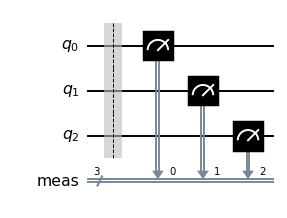

In [37]:
qc_em_2 = QuantumCircuit(3)

# Measure all qubits and create a classical register with 1:1 mapping between
# qubits number and classical bit number
qc_em_2.measure_all()

qc_em_2.draw('mpl', scale=0.7, style="clifford")

## Circuit execution (on a local simulator)

Une fois le circuit est construit, il faut l'exécuter sur un ordinateur quantique (QPU: Quantum Processing Unit). 
Il faut savoir que l'accès aux QPU réels est limité et peut être coûteux. Heureusement, Qiskit fournit des simulateurs locaux qui imitent le comportement des ordinateurs quantiques réels, permettant aux développeurs de tester et de déboguer leurs circuits sans avoir besoin d'un accès direct à un matériel quantique.

Dans ce tutorial (et défi) on utilise le simulateur Aer de Qiskit `AerSimulator` pour exécuter nos circuits quantiques localement.

Il faut savoir que similaire a un program classique qui doit etre compilé et optimiser avant d'etre exécuté sur un processeur, un circuit quantique doit aussi etre "transpilé" (compilé et optimisé) avant d'etre exécuté sur un QPU ou un simulateur.

In [38]:
# Helper function to run a quantum circuit on a local Aer simulator
def run_circuit_on_simulator(qc:QuantumCircuit, shots:int=1024):
    """
    Function to run a quantum circuit on a local Aer simulator and return the measurement counts.
    Args:
        qc (QuantumCircuit): The quantum circuit to be executed.
        shots (int): The number of shots (repetitions) for the execution. Default is 1024.
    Returns:
        dict: A dictionary with measurement outcomes as keys and their counts as values.
    """
    # Initialize the Aer simulator
    simulator = AerSimulator()

    # Transpile the circuit for the simulator
    compiled_circuit = transpile(qc, simulator)

    # Execute the circuit on the simulator
    job = simulator.run(compiled_circuit, shots=shots)

    # Grab results from the job
    result = job.result()

    # Return counts
    return result.get_counts()

print("Helper function 'run_circuit_on_simulator' defined successfully.")

Helper function 'run_circuit_on_simulator' defined successfully.


Mesure de |+⟩ en base Z (≈50/50):
{'0': 534, '1': 490}


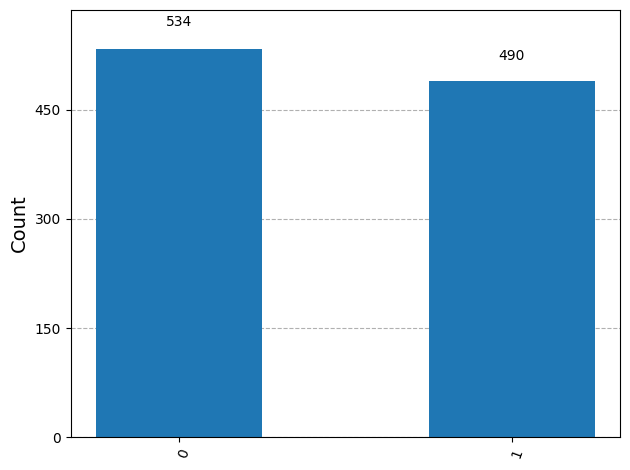

In [39]:
# Mesurer un état |+⟩ en base Z : résultats ≈50/50
qc_measure = QuantumCircuit(1)
qc_measure.h(0)  # Créer |+⟩
qc_measure.measure_all()

counts = run_circuit_on_simulator(qc_measure, shots=1024)
print("Mesure de |+⟩ en base Z (≈50/50):")
print(counts)
plot_histogram(counts)

**Note importante :** Une fois mesuré, l'état s'effondre et on ne peut plus récupérer l'information originale. C'est la base de la sécurité du protocole BB84 !

---
## 6. Les bases de mesure (Z et X)

On peut mesurer un qubit selon différents bases (axes sur la sphère de Bloch).

- **Base Z** (computationnelle) : { |0⟩, |1⟩ } — axe vertical
- **Base X** (diagonale) : { |+⟩, |−⟩ } — axe horizontal

In [40]:
# Fonction helper pour mesurer dans différentes bases
def measure_in_basis(circuit: QuantumCircuit, basis: str = "Z", shots: int = 1024):
    """
    Mesure un circuit dans la base Z ou X.
    
    Astuce : Pour mesurer en base X, on applique H avant de mesurer en Z !
    
    Args:
        circuit: Le circuit quantique à mesurer
                 important : ne doit pas contenir de mesures préalables
        basis: 'Z' (par défaut) ou 'X'
        shots: Nombre de répétitions
    
    Returns:
        dict: Comptages des résultats
    """
    qc = circuit.copy()

    if basis.upper() == "Z":
        pass  # do nothing, since measuring in Z basis is default
    
    if basis.upper() == "X":
        qc.h(0)  # Transformer la base X en base Z
    
    qc.measure_all()

    return run_circuit_on_simulator(qc, shots=shots)

print(" Fonction measure_in_basis définie")

 Fonction measure_in_basis définie


### 6.1 Exemple : Mesurer |+⟩ dans les deux bases

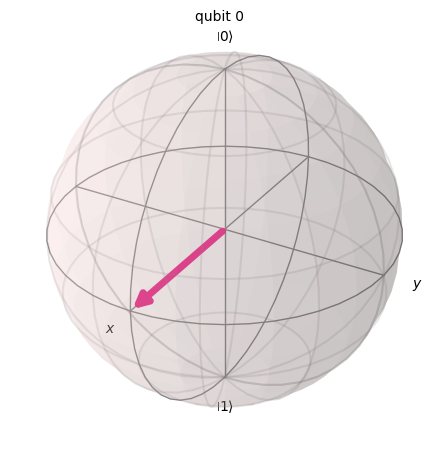

In [42]:
# Préparer |+⟩
qc_plus_test = QuantumCircuit(1)
qc_plus_test.h(0)

plot_bloch_multivector(Statevector(qc_plus_test))

**Mesuré en base X** : le qubit est parfaitement aligné avec X+
- Résultat = |+⟩ (**0**), 100% certain, car |+⟩ = côté positif de X

**Mesuré en base Z** : le qubit est exactement sur l'équateur, à égale distance des pôles Z+ et Z−
- Résultat = **0 ou 1** (≈50/50, aléatoire !)

In [43]:
# Mesurer en base X (même base) → résultat certain (0)
counts_x = measure_in_basis(qc_plus_test, basis="X", shots=1024)
print("Mesure de |+⟩ en base X (100% de 0):", counts_x)

# Mesurer en base Z (base différente) → résultat aléatoire (≈50/50)
counts_z = measure_in_basis(qc_plus_test, basis="Z", shots=1024)
print("Mesure de |+⟩ en base Z (≈50/50):", counts_z)

Mesure de |+⟩ en base X (100% de 0): {'0': 1024}
Mesure de |+⟩ en base Z (≈50/50): {'1': 510, '0': 514}


**Règle clé pour BB84 :**
- **Même base** : résultat déterministe (on retrouve le bit encodé)
- **Bases différentes** : résultat aléatoire (≈50/50)

---
## 7. Encoder des bits dans différentes bases

Alice encode des bits classiques (0 ou 1) en états quantiques (qubits) en utilisant les bases Z ou X, en appliquant les portes quantiques appropriées.

In [44]:
# Fonction helper pour encoder un bit dans une base
def encode_bit_in_basis(bit: int, basis: str) -> QuantumCircuit:
    """
    Encode un bit classique (0 ou 1) dans la base Z ou X.
    
    Encodage :
    - Base Z : 0→|0⟩ (rien), 1→|1⟩ (porte X)
    - Base X : 0→|+⟩ (porte H), 1→|−⟩ (portes H puis Z)
    
    Args:
        bit: Le bit à encoder (0 ou 1)
        basis: La base d'encodage ('Z' ou 'X')
    
    Returns:
        QuantumCircuit: Le circuit avec l'état encodé
    """
    qc = QuantumCircuit(1)
    
    if basis.upper() == "Z":
        if bit == 1:
            qc.x(0)  # |0⟩ → |1⟩
        # sinon, on garde |0⟩ (état par défaut)
    
    elif basis.upper() == "X":
        qc.h(0)  # |0⟩ → |+⟩
        if bit == 1:
            qc.z(0)  # |+⟩ → |−⟩
    
    else:
        raise ValueError("Basis must be 'Z' or 'X'")
    
    return qc

print("Fonction encode_bit_in_basis définie")

Fonction encode_bit_in_basis définie


### 7.1 Test complet : encoder et mesurer dans la même base

Vérifions qu'on retrouve toujours le bit original quand on mesure dans la même base :

In [47]:
# Tester toutes les combinaisons (bit, base)
print("=" * 60)
print("Test : Encoder et mesurer dans la MÊME base")
print("=" * 60)

for basis in ("Z", "X"):
    for bit in (0, 1):
        # Encoder
        state = encode_bit_in_basis(bit, basis)
        
        # Mesurer dans la même base
        counts = measure_in_basis(state, basis, shots=1024)
        
        # Résultat le plus fréquent
        result = max(counts, key=counts.get)
        
        print(f"Bit={bit}, Base={basis} → Mesure en base {basis}: {counts} → Résultat: {result}")

print("\nTous les bits sont correctement retrouvés !")

Test : Encoder et mesurer dans la MÊME base
Bit=0, Base=Z → Mesure en base Z: {'0': 1024} → Résultat: 0
Bit=1, Base=Z → Mesure en base Z: {'1': 1024} → Résultat: 1
Bit=0, Base=X → Mesure en base X: {'0': 1024} → Résultat: 0
Bit=1, Base=X → Mesure en base X: {'1': 1024} → Résultat: 1

Tous les bits sont correctement retrouvés !
Bit=1, Base=X → Mesure en base X: {'1': 1024} → Résultat: 1

Tous les bits sont correctement retrouvés !


### 7.2 Test : mesurer dans la mauvaise base

Que se passe-t-il si on encode dans une base mais mesure dans l'autre ?

In [48]:
# Encoder en base Z, mesurer en base X (et vice-versa)
print("=" * 60)
print("Test : Encoder et mesurer dans des bases DIFFÉRENTES")
print("=" * 60)

# Cas 1 : Encoder en Z, mesurer en X
state_z = encode_bit_in_basis(0, "Z")  # |0⟩
counts_x = measure_in_basis(state_z, "X", shots=1024)
print(f"Encodé 0 en base Z (|0⟩), mesuré en base X: {counts_x} → Aléatoire!")

# Cas 2 : Encoder en X, mesurer en Z
state_x = encode_bit_in_basis(0, "X")  # |+⟩
counts_z = measure_in_basis(state_x, "Z", shots=1024)
print(f"Encodé 0 en base X (|+⟩), mesuré en base Z: {counts_z} → Aléatoire!")

print("\nLes bases différentes donnent des résultats aléatoires ≈50/50")

Test : Encoder et mesurer dans des bases DIFFÉRENTES
Encodé 0 en base Z (|0⟩), mesuré en base X: {'0': 542, '1': 482} → Aléatoire!
Encodé 0 en base X (|+⟩), mesuré en base Z: {'1': 550, '0': 474} → Aléatoire!

Les bases différentes donnent des résultats aléatoires ≈50/50


---
## 8. L'intrication quantique (Bonus)

L'intrication crée une corrélation parfaite entre deux qubits, peu importe la distance.

**Note :** L'intrication n'est PAS utilisée dans BB84, mais c'est un concept fondamental de l'informatique quantique.

Circuit de Bell :
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Résultats (état intriqué):
{'11': 548, '00': 476}

✓ Les qubits sont corrélés : toujours (00) ou (11), jamais (01) ou (10) !


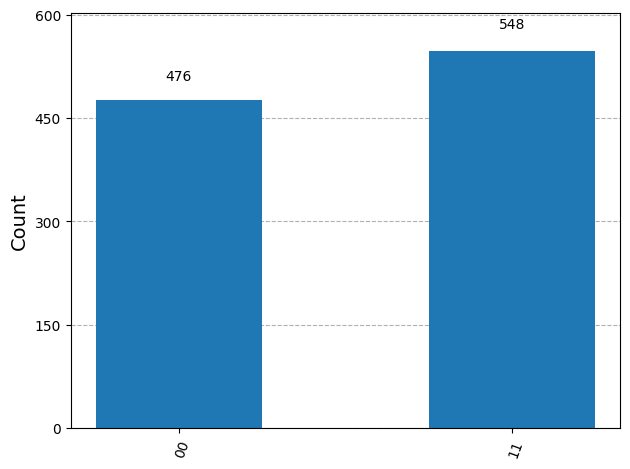

In [ ]:
# Créer un état de Bell : |Φ+⟩ = (|00⟩ + |11⟩)/√2
qc_bell = QuantumCircuit(2, 2)

# Étape 1 : Créer une superposition sur le qubit 0
qc_bell.h(0)

# Étape 2 : Appliquer CNOT pour intriquer les deux qubits
qc_bell.cx(0, 1)

# Mesurer les deux qubits
qc_bell.measure([0, 1], [0, 1])

print("Circuit de Bell :")
print(qc_bell.draw('text'))

# Exécuter et observer les corrélations
counts = run_circuit_on_simulator(qc_bell, shots=1024)
print("\nRésultats (état intriqué):")
print(counts)
print("\nLes qubits sont corrélés : toujours (00) ou (11), jamais (01) ou (10) !")

plot_histogram(counts)

---
## 9. Boîte à outils pour le challenge BB84

Voici les **trois fonctions essentielles** dont vous aurez besoin pour implémenter le protocole BB84 :

  1) `run_circuit_on_simulator(qc, shots=1024)` : Exécute un circuit quantique sur le simulateur Aer  


  2) `encode_bit_in_basis(bit, basis)` : Crée un circuit qui encode un bit (0/1) dans une base ('Z'/'X')  

  3) `measure_in_basis(circuit, basis='Z', shots=1024)` : Mesure un circuit dans la base Z ou X  


---
### 9.2 Exemple d'utilisation : simuler un échange simple Alice→Bob
Simulation simple : Alice envoie 1 qubit, Bob le mesure

In [57]:
print("Alice encode un bit  -------------------------- ")

# Alice choisit un bit et une base aléatoirement
alice_bit = random.choice([0, 1])
alice_basis = random.choice(["Z", "X"])

# Alice encode
qc_alice = encode_bit_in_basis(alice_bit, alice_basis)
print(f"\n[Alice] Bit={alice_bit}, Base={alice_basis}")

# ------------------------------------------------------

print("\nBob read the bit -------------------------- ")

# Bob choisit une base aléatoirement et mesure
bob_basis = random.choice(["Z", "X"])
counts = measure_in_basis(qc_alice, bob_basis, shots=1)
bob_result = list(counts.keys())[0]

print(f"[Bob]   Base={bob_basis}, Résultat={bob_result}")

# ------------------------------------------------------

print("\nVérification  -------------------------- ")

if alice_basis == bob_basis:
    match = "OUI" if str(alice_bit) == bob_result else "NON"
    print(f"Bases identiques ! Le bit devrait correspondre : {match}")
else:
    print(f"Bases différentes ! Le résultat est aléatoire (peut correspondre ou pas)")


print("\nExécutez cette cellule plusieurs fois pour voir différents cas !")

Alice encode un bit  -------------------------- 

[Alice] Bit=0, Base=Z

Bob read the bit -------------------------- 
[Bob]   Base=X, Résultat=1

Vérification  -------------------------- 
Bases différentes ! Le résultat est aléatoire (peut correspondre ou pas)

Exécutez cette cellule plusieurs fois pour voir différents cas !


---
## 10. Conclusion et prochaines étapes

**Félicitations !** Vous maîtrisez maintenant tous les concepts nécessaires pour comprendre et implémenter le protocole BB84 :

✓ **Qubits et superposition** : |0⟩, |1⟩, |+⟩, |−⟩  
✓ **Portes quantiques** : X, H, Z, CNOT  
✓ **Circuits quantiques** : structure et exécution  
✓ **Mesure et effondrement** : projection et destruction de la superposition  
✓ **Bases de mesure** : Z (computationnelle) et X (diagonale)  
✓ **Encodage** : préparer des bits dans différentes bases  
✓ **Intrication** : corrélations quantiques (bonus)

### Votre mission BB84

Le protocole BB84 utilise tous ces concepts pour créer une clé secrète partagée entre Alice et Bob :

1. **Alice** encode des bits aléatoires dans des bases aléatoires (Z ou X)
2. **Bob** mesure dans des bases aléatoires
3. Ils comparent publiquement leurs **bases** (pas les bits !)
4. Ils ne gardent que les positions où les bases correspondent (**tamisage**)
5. Ils vérifient un échantillon pour détecter un espion (**estimation d'erreurs**)

### Ressources

- **`tutorial.md`** : Explications détaillées de tous les concepts
- **Ce notebook** : Exemples de code pratiques et réutilisables
- **`bb84_challenge.py`** : Votre challenge à compléter !

**Bon challenge et amusez-vous bien avec l'informatique quantique ! 🚀**